# Исследование объявлений о продаже квартир



### План проекта

<br>[1. Шаг 1. Загрузка данных и их изучение ](#step1)
<br>[2. Шаг 2. Предобработка данных:](#step2)
<br>[2.1 Изучение пропусков в столбцах и причин их возникновения](#step2.1)
<br>[2.1.1 Населенный пункт(ceiling_height)](#step2.1.1)
<br>[2.1.2 Высота потолков (ceiling_height)](#step2.1.2)
<br>[2.1.3 Жилая площадь(living_area)](#step2.1.3)
<br>[2.1.4 Площадь кухни (kitchen_area)](#step2.1.4)
<br>[2.1.5 Количество этажей в доме (floors_total)](#step2.1.5)
<br>[2.1.6 Количество балконов в квартире(balcony)](#step2.1.6)
<br>[2.1.7 Апартаменты или нет?(is_apartment)](#step2.1.7)
<br>[2.1.8 Количество дней размещения(days_exposition)](#step2.1.8)
<br>[2.1.9 Столбцы выгруженные автоматически](#step2.1.9)
<br>[2.2 Изменение типов данных столбцов](#step2.2)
<br>[3.Шаг 3. Добавление новых данных](#step3)
<br>[3.1 Расчитаем и добавим в таблицу цену квадратного метра](#step3.1)
<br>[3.2 Добавим в таблицу столбцы день недели, месяц и год публикации объявления](#step3.2)
<br>[3.3 Добавим в таблицу столбец с этажем квартиры](#step3.3) 
<br>[3.4 Добавим в таблицу столбцы с соотношением жилой и общей площади и отношение площади кухни к общей](#step3.4)
<br>[4.Шаг 4. Исследовательский анализ данных:](#step4)
<br>[4.1 Изучаем площадь, цену, число комнат, высоту потолков.](#step4.1)
<br>[4.2 Изучаем время продажи квартиры](#step4.2)
<br>[4.3 Убираем редкие и выбивающиеся значения](#step4.3)
<br>[4.4 Изучаем факторы влияющие на стоимость квартиры](#step4.4)
<br>[4.5 Изучаем стоимость жилья в 10 населенных пунктах](#step4.5)
<br>[4.6 Изучаем предложения квартир в Санкт - Петербурге](#step4.6)
<br>[4.7 Изучаем сегмент квартир в центре Санкт-Петербурга](#step4.7) 
<br>[4.8 Изучаем факторы влияющие на стоимость жилья в центре Санкт- Петербурга](#step4.8)
<br>[5. Шаг 5.Общий вывод](#step5)

### 1. Загрузка данных и их изучение <a id='step1'></a>


#### Изучаем данные в таблице

Сразу импортируем все необходимые для работы бибилиотеки, загружаем данные из .csv файла в наш датафрейм, выводим общую информацию о таблице и случайные 5 строк датафрейма для визуальнеой оценки данных. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep = "\t")


data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3165,5,11866860.0,107.8,2017-10-03T00:00:00,4,2.7,11.0,67.8,9,False,...,10.9,NaN,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,388.0
3720,18,3195000.0,30.0,2018-04-06T00:00:00,1,NaN,17.0,14.0,10,NaN,...,8.0,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
15531,13,7500000.0,66.1,2019-03-14T00:00:00,3,3.9,5.0,44.7,3,NaN,...,12.2,NaN,Санкт-Петербург,22105.0,2359.0,2.0,705.0,1.0,65.0,5.0
3984,18,3850000.0,35.5,2017-06-21T00:00:00,1,NaN,22.0,17.6,1,NaN,...,9.0,2.0,Санкт-Петербург,26078.0,10251.0,1.0,387.0,0.0,NaN,152.0
3646,16,17000000.0,85.0,2019-02-28T00:00:00,2,2.9,5.0,44.2,3,NaN,...,24.4,NaN,Санкт-Петербург,27686.0,8393.0,0.0,NaN,1.0,545.0,NaN


### Вывод

Импортируем необходимые нам библиотеки и производим вывод информациии о датасете предоставленном для работы. Делаем выводы о том, что датасет состоит из 23699 строк, данные содержат пустые значения, некоторые столбцы требуют перевода в другой формат данных. Необходимо определить, какие значения можно столбцы можно оставить без заполнения пустых значений. Для остальных необходимо определить методы заполнения NaN.

### 2. Предобработка данных <a id = 'step2'><a/>

#### 2.1 Изучение пропусков в столбцах и причин их возникновения<a id ='step2.1'></a>

##### 2.1.1 Населенный пункт(locality_name) <a id ='step2.1.1'></a>
<br>
Данный столбец имеет пропуски, так как его не указал при размещении объявления продавец. Для нашего исследования данный столбец имеет первоочередное значения, ведь наша задача исследовать рынок недвижимости Санкт- Петиербурга и близлежащих населенных пунктов, поэтому пустые значения в данном столбце подлежат обязательному удалению, так как не позволяют идентифицировать объект недвижимост, как относящийся к заданному георасположению.  Тем более, что количество таких объявлений - всего 49 штук. Исходные данные не пострадают. 

In [3]:
print('Количество строк до удаления NaN:', len(data))

Количество строк до удаления NaN: 23699


In [4]:
data.dropna(subset = ['locality_name'], inplace = True )
print('Количество строк после удаления NaN:', len(data))

Количество строк после удаления NaN: 23650


##### Вывод:
<br>
Теперь наши данные имеют четкую привязку к заданному месторасположению и они пригодны для дальнейшей обработки. 

##### 2.1.2 Высота потолков (ceiling_height) <a id = 'step2.1.2'></a>
<br>
Основная причина возникновения пропусков в столбце с высотой потолков состоит в том, что продавец при размещении объявления не указал этот параметр, то есть пропуски неслучайные. Для определения способа заполнения пропусков, и вообще необходимости такого заполнения необходимо посомтрим на распределение данных методом .describe(), для определния выбросов и распределния.Также проверим минимумы и максимумы для определния выбросов. 

In [5]:
print(data['ceiling_height'].describe())

print('Минимальная высота потолков:',data['ceiling_height'].min())
print('Максимальная высота потолков:',data['ceiling_height'].max())

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Минимальная высота потолков: 1.0
Максимальная высота потолков: 100.0


##### Вывод:
<br>
Распредление высоты потолков имеет вид распределния Пуассона,как мы видим, максимум значений расположился в диапозоне от 2,5 до 2,8 метров, что вполне характерные  для квартир значения. Также мы видим нехарактерные выбросы, так минимальная высота потолков равна 1 м, что характерно для коморки Папы Карло, но никак не для квартиры, а также высота 20 метров, что характерно для стадиона и 100 метров, что явно не отражает реальную высоту потолков. Пропуски можно заполнить средним значением, а можно оставить их незаполненными, так как высота потолка не оказывает влияния на решения задач которые поставлены в исследовании.

**Мы решили не заполнять пропуски в столбце "Высота потолков"**

##### 2.1.3 Жилая площадь(living_area) <a id = 'step2.1.3'></a>
<br>
Пропуски в столбце " Жилая площадь возникли по причинам, указанным выше, а именно невнемательности или лени человека, который заполнял объявление, пропуски появились случайно. Так как нам необходимы данные из этого столбца, то мы их заполним с помощью применения коэффициента к общей жилой площади. Коэффицент - среднее отношение жилой площади к общей.
Вычислим коэффициент, затем отфильтруем столбец по пустым значениям, сохраним его в переменную, затем умножим значения столбца общей площади и заполним пропуски в столбце жилой площади полученными значениями. 

Посмотрим на данные по столбцу living_area, чтобы исключить появления искажений после заполнения пропусков

In [6]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [7]:
living_area_not_nan = data.query('living_area != "NaN"')

living_area_koef = (
    (
    living_area_not_nan['living_area'] / living_area_not_nan['total_area'])
    .mean()
)
living_area_koef = round(living_area_koef, 2) #Округлим полученные значения до 2 знаков после запятой query
data['living_area'].fillna(data['total_area'] * living_area_koef, inplace =True)
print('Коэффициент среднего отношения общей площади к жилой:',living_area_koef)
print('Количество пропусков после замены в столбце:',data['living_area'].isna().sum())


Коэффициент среднего отношения общей площади к жилой: 0.56
Количество пропусков после замены в столбце: 0


Теперь оценим насколько изменились данные после заполнения пропусков:

In [8]:
data['living_area'].describe()

count    23650.000000
mean        34.526541
std         22.311305
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

##### Вывод:
<br>
Мы заполнили пропуски в столбце "жилая площадь" с помощью коэффициента living_area_koef и проверили на наличие пропусков после заполнения. Также проверили как изменилось распределение после замены пропусков, обнаружились выбросы например минимальная жилая площадь равна 2 квадратным метрам, что очень немного.  


##### 2.1.4 Площадь кухни (kitchen_area)<a id = 'step2.1.4'></a>
<br>
Пропуски в столбце с площадью кухни возникли по указнным выше причинам. Обрабатывать ппропуски мы будем с помощью метода, который мы применили к жилой площади. Для начала посмотрим на данные в столбце, чтобы исключить после обработки пропусков сильных искажений: 

In [9]:
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [10]:
kitchen_area_not_nan = data.query('kitchen_area != "NaN"')

kitchen_area_koef = (
    (
    kitchen_area_not_nan['kitchen_area'] / kitchen_area_not_nan['total_area'])
    .mean()
)
kitchen_area_koef = round(kitchen_area_koef, 2) #Округлим полученные значения до 2 знаков после запятой query
data['kitchen_area'].fillna(data['total_area'] * kitchen_area_koef, inplace =True)
print('Коэффициент среднего отношения общей площади к площади кухни:',kitchen_area_koef)
print('Количество пропусков после замены в столбце:',data['kitchen_area'].isna().sum())

Коэффициент среднего отношения общей площади к площади кухни: 0.19
Количество пропусков после замены в столбце: 0


Проверим насколько изменились данные после заполнения пропусков:

In [11]:
data['kitchen_area'].describe()

count    23650.000000
mean        10.583462
std          6.106223
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

##### Вывод:
<br>
Как мы видим, после замены пустых значений в толбце "Площадь кухни" искажения будут минимальными, так как подставленные значения изменили исходное распределение минимально. Среднее изменилось всего на 0,02 м.кв 

##### 2.1.5 Количество этажей в доме (floors_total)<a id = 'step2.1.5'></a> 
<br>
Пропуски в этом столбце образовались ввиду невнимательного или ленивого заполнения объявления, когда человек для экономии времени не заполнил данный параметр. Сначала необходимо посмотреть на общую картину данных данного столбца, нам необходим данный столбец для того, чтобы создать выборку по этажу квартиры, но так как нам понадобятся данные только трех категорий - первый,  последний и другой, то из пропущенных значений мы выберем те которые находятся на первом этаже и сделаем отметку в соответствующем столбце.  

In [12]:
data['floors_total'].describe()


count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


Как мы видим количество пропущеных значений незначительно и если мы заполним недостающие значения медианным значением, искажение будет таковым, которым можно будет принебречь. Поэтому смело заполняем пропуски и проверим после этого получившиеся данные:


In [13]:
data['floors_total'].fillna(9, inplace =True)
data['floors_total'].describe()


count    23650.000000
mean        10.669852
std          6.583725
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

##### Вывод:
<br>
Как мы видим, после замены пустых значений в толбце "Количество этажей" искажения будут минимальными, так как подставленные значения изменили исходное распределение минимально. 

##### 2.1.6 Количество балконов в квартире(balcony)<a id = 'step2.1.6'></a> 
<br>
Пропуски в столбце с количеством балконов - образовались ввиду того, что продавец при заполнении шаблона объявления, при отсутствии балкона не ставил цифру 0 в соответствующем поле, таким образом, мы просто заполним пропуски в этом столбце нулями, тем более что большого влияния этот столбец на поставленные нам задачи не оказывает. Ну и по традиции посмотрим на данные этого столбца перед тем, как менять что-то в данных: 


In [14]:
data['balcony'].describe()

count    12137.000000
mean         1.153003
std          1.071169
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Заменяем пропуски на нули: 


In [15]:
data['balcony'].fillna(0, inplace =True)

Проверяем полученные данные: 

In [16]:
data['balcony'].describe()

count    23650.000000
mean         0.591712
std          0.959662
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

##### Вывод:
<br>
Просто поменяли пропуски на нули, больше тут сказать нечего. Такой вот вывод...&#129335;&#8205;&#9794;&#65039;

##### 2.1.7 Апартаменты или нет?(is_apartment)<a id = 'step2.1.7'></a> 
<br>
Данный столбец имеет неправильный формат данных, он должен быть "bool", а его тип "object", возможно он имеет пропуски потому, как возможно их не указал продавец, однако это надо проверить, либо же они возникли при переводе типа данных. 

Посчитаем сумму значений и сравним с количеством непустых, строк, если они совпадут, то просто заменим пропуски нулями и дело с концом, а потом еще переведм в булев тип. Но это уже позже 

In [17]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Как мы видим, всего 50 значений с апартаментами, из всего многообразия, олтсюда сделаем вывод, что при заполнении объявлений, пользователи игнорировали и этот пункт объявлений. Поэтому, меняем пустые значения на False и в последствии переводем этот столбец в булев тип. 

In [18]:
data['is_apartment'].fillna(False, inplace =True)


Проверим, что значения изменились: 

In [19]:
data['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

##### Вывод:
<br>
Просто поменяли пропуски на False, столбец не оказывает особого влияния на выполнение задачи.

##### 2.1.8 Количество дней размещения(days_exposition)<a id = 'step2.1.8'></a> 
<br>
Пропуски в этом, довольно важном столбце вызваны неправильной выгрузкой значений, посмотри на структуру данных:

In [20]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

##### Вывод:
<br>
Заполнять пропуски в этом столбце мы не будем, столбец не оказывает особого влияния на выполнение задачи. И он получен в результате автоматической выгрузки из сервиса Яндекс. Недвижимость. 

##### 2.1.9 Столбцы выгруженные автоматически<a id = 'step2.1.9'></a> 
<br>
Пропуски данных в столбцах выгруженных автоматически, появились по причине того, что продавец по каким то причинам, не поставил геометку расположения квартиры на карте, ввиду этого для объявлений не сформировались столбцы: 

Расстояние до аэропорта(airports_nearest), Расстояние до центра(cityCenters_nearest), Количество парков в радиусе 3 километров(parks_around3000), 

Расстояние до ближайшего парка в метрах(parks_nearest), Количество водоемов в радиусе 3 километров (ponds_around3000),Расстояние до ближайшего парка в метрах  (ponds_nearest). 

Единственный момент - переименуем столбец cityCenters_nearest в более правильный city_сenters_nearest

In [21]:
data.rename(columns={'cityCenters_nearest':'city_сenters_nearest'}, inplace=True)

##### Вывод:
<br>
Заполнять пропуски в этих столбцах мы не будем. Так как они получены в результате автоматической выгрузки из сервиса Яндекс. Недвижимость и заполнение их средними или медианными значениями приведет к сильному искажению данных. 

#### 2.2 Изменение типов данных столбцов<a id ='step2.2'></a>
<br>
Нам нужно привести следующие столбцы к другим типам данных: 

Дата размещения (first_day_exposition) к формату datetime(сейчас его тип object), так как фактически это столбец времени и даты. 

Столбец с ценой, нужно перевести в целочисленный формат, так как копейки обычно не учитывают при покупке квартиры за миллионы(сейчас его тип float64)

Общее количество этажей(floors_total) в целочисленный формат, так как 2,5 этажа не бывает &#128517;(сейчас его тип float64)

Количество балконов (balcony) в целочисленный формат, потому как 2,5 балкона звучит не менее дико, чем про этажи(сейчас его тип float64)

Столбец апартаментов(is_apartment) необходимо перевести в булев тип (сейчас его тип object), так как его при выгрузке перевели в неправильный формат.

Так займемся же этим непростым делом: 

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y-%m-%d')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

Проверим что у нас получилось:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_сenters_nearest    18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around30

##### Вывод:
<br>
Мы изменили данные на более удобочитаемые и наглядные данные, которые впоследствии можно будет проще использовать

### Шаг 3. Посчитайте и добавьте в таблицу<a id ='step3'></a>

#### 3.1 Расчитаем и добавим в таблицу цену квадратного метра<a id ='step3.1'></a>
<br>
Для расчета добавим в таблицу data новый столбец price_square_meter для этого поделим цену на площадь: 

In [24]:
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'] = data['price_square_meter'].round(2)

Проверим что новый столбец добавился, выведем верхние 5 строк: 

In [25]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.60,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14,89.04,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


##### Вывод:
<br>
Добавили новый столбец со стоимостью квадратного метра для всех квартир

#### 3.2 Добавим в таблицу столбцы день недели, месяц и год публикации объявления<a id ='step3.2'></a>
<br>
Для добавления используем методы dt.weekday, dt.month, dt.year:

In [26]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Проверим результат добавления столбцов: 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_сenters_nearest    18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around30

##### Вывод:
<br>
Добавили  столбецы с днем недели, месяцем и годом публикации объявления. 

#### 3.3 Добавим в таблицу столбец с этажем квартиры<a id ='step3.3'></a>
<br>

Добавление столбца с категорированием этажей, мы сделаем с помощью функции:

In [28]:
def cat_floors(data):
    floors = data['floors_total']
    floor = data['floor']
    if floor == 1: 
        return 'Первый'
    if floor == floors: 
        return 'Последний'
    return 'Другой'

data['cat_floors'] = data.apply(cat_floors, axis = 1)
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,cat_floors
17917,9,1400000,39.0,2018-10-15,1,NaN,3,16.0,2,False,...,NaN,NaN,NaN,NaN,100.0,35897.44,0,10,2018,Другой
8457,10,5290000,56.4,2019-04-23,2,NaN,14,31.0,1,False,...,1.0,256.0,0.0,NaN,NaN,93794.33,1,4,2019,Первый
3126,17,5000000,59.9,2015-11-09,2,2.65,22,36.1,6,False,...,NaN,NaN,NaN,NaN,679.0,83472.45,0,11,2015,Другой
7496,6,2550000,23.0,2016-05-15,1,NaN,9,12.0,3,False,...,0.0,NaN,1.0,517.0,124.0,110869.57,6,5,2016,Другой
11752,8,2800000,29.3,2018-02-01,1,2.55,5,15.3,1,False,...,1.0,1057.0,0.0,NaN,323.0,95563.14,3,2,2018,Первый


##### Вывод:
<br>
Как мы видим, столбец добавился, значения отображаются корректно.  

#### 3.4 Добавим в таблицу столбцы с соотношением жилой и общей площади и отношение площади кухни к общей<a id ='step3.4'></a>
<br>

Добавление столбцев мы сделаем с помощью арифметических операций со столбцами :

In [29]:
data['living_total_area'] = data['living_area'] / data['total_area']
data['kitchen_total_area'] = data['kitchen_area'] / data['total_area']
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,cat_floors,living_total_area,kitchen_total_area
14642,14,6290000,72.0,2016-09-13,3,2.50,12,48.0,12,False,...,0.0,NaN,946.0,87361.11,1,9,2016,Последний,0.666667,0.097222
11682,11,3300000,35.0,2017-11-10,1,2.50,10,16.0,4,False,...,0.0,NaN,36.0,94285.71,4,11,2017,Другой,0.457143,0.274286
17296,14,6300000,63.0,2016-11-08,2,2.65,24,31.0,17,False,...,0.0,NaN,364.0,100000.00,1,11,2016,Другой,0.492063,0.190476
20474,18,3100000,35.5,2017-09-27,1,2.70,10,15.8,5,False,...,1.0,861.0,8.0,87323.94,2,9,2017,Другой,0.445070,0.233803
418,5,3100000,30.0,2018-02-21,1,2.60,5,17.0,3,False,...,0.0,NaN,14.0,103333.33,2,2,2018,Другой,0.566667,0.183333


##### Вывод:
<br>
Добавленные столбцы отображаются корректно и отражают заданные параметры в полном объеме  

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a id ='step4'></a>
<br>


#### 4.1 Изучаем площадь, цену, число комнат, высоту потолков <a id ='step4.1'></a>
<br>

Получим числовое описание колонок и построим гистограммы следующих параметров: 

1. Площадь
2. Цена
3. Число комнат 
4. Высота потолков

Числовое описание получим с помощью метода .describe() для опредения максимумом и минимумов в заданных столбцах( это необходимо, чтобы строить графики с учетом выбросов) а, строить диаграмы будем с импользованием метода .plot() для большей наглядности: 

In [30]:
print(data['total_area'].describe())
print()
print(data['last_price'].describe())
print()
print(data['rooms'].describe())
print()
print(data['ceiling_height'].describe())
print()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64



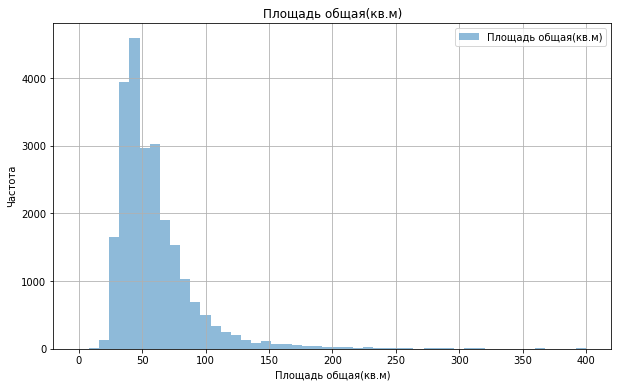

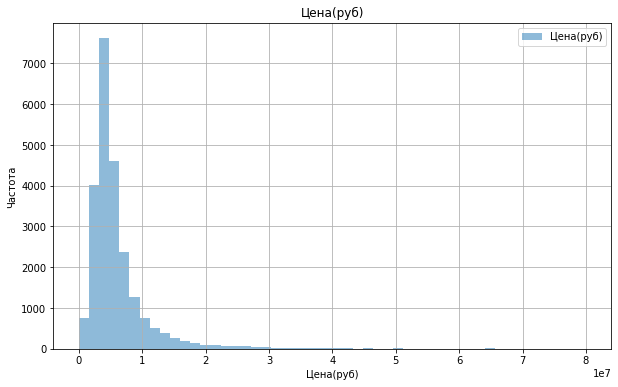

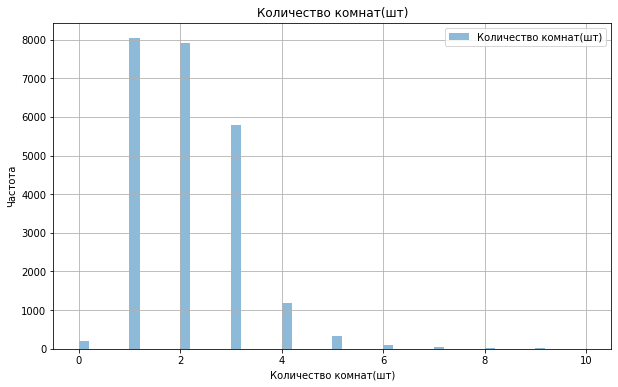

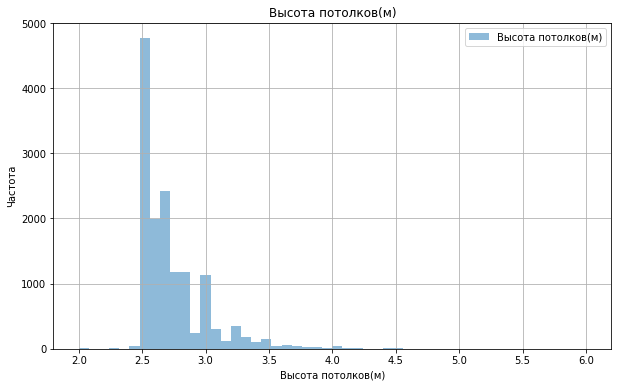

In [31]:
def my_graph(data, column, range1, range2, name):
    data.plot(y = column,
              kind='hist',
              histtype = 'bar',
              range = (range1, range2),
              bins = 50,
              alpha = 0.5,
              label = name,
              figsize = (10,6),
              grid = True,
              legend = True
              )
    plt.title(name)
    plt.xlabel(name)
    plt.ylabel('Частота')


my_graph(data, 'total_area', 0, 400, 'Площадь общая(кв.м)')
my_graph(data, 'last_price', 0, 80000000, 'Цена(руб)')
my_graph(data, 'rooms', 0, 10, 'Количество комнат(шт)')
my_graph(data, 'ceiling_height', 2, 6, 'Высота потолков(м)')

##### Вывод:
<br>
Изучив столбцы с помощью числового описания данных и гистограмм мы приходим к следующим выводам: 


1. Площадь общая имеет нормальное распределение, минимальное значение - 12 квадратных метров, максимальное - 900 квадратных метров(что конечно же указывает на нехарактерные выбросы), больше всего значений - 40 квадратных метров.


2. Цена имеет нормальное рапределение, минимальное значение цены квартиры - 12 190 рублей, максимальное значение 76 300 000 рублей, максимольное число значений приходится на 4,7 -5 млн. рублей. Соответственно, в данных есть выбросы и нехарактерные значения. 


3. Количество комнат имеет распределение Пуассона, и выбросы в количестве комнат - 0, хотя вполне возможно, что так продавец обозначал студию, но таких значений немного и их можно перевести в 1, имеется и выброс в максимальное значение в 19 комнат(что скорее характерно для особнякя, нежели для квартиры. 


4. Высота потолков имеет нормальное рапределение, минимальное значение - 2 метра, скорее характерно для коморки Папы Карло, нежели для квартиры, ну и выпад на 100 метров высоты потолка является нехарактерным значением, которое выглядит более чем фантастично. Максимальное количество значений приходится на 2,5 метраб имеются провалы в гистограмме которые характеризуют высоту потолков не характерную для квартир, например 2,55, затем иедт пик 2,60, затем снова провал с высотой оптолков 2,65, а затем снова взлет на 2,70. 

#### 4.2 Изучаем время продажи квартиры<a id ='step4.2'></a>
<br>
Для изучения времени продажи квартиры получим числовое описание данных методом .describe(), затем построим гистограмму, методом .plot().

In [32]:
print(data['days_exposition'].describe())


count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


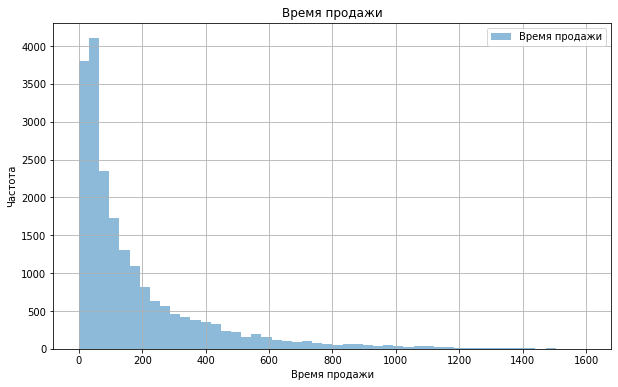

In [33]:
my_graph(data, 'days_exposition', 0, 1600, 'Время продажи')


Посчитаем медиану и среднее для времени продажи квартиры: 

In [34]:
print('Среднее значение времени продажи квартиры:',data['days_exposition'].mean())
print('Медианное значение времени продажи квартиры:',data['days_exposition'].median())

Среднее значение времени продажи квартиры: 180.7531998045921
Медианное значение времени продажи квартиры: 95.0


Для оценки времени продажи построим ящик с усами:

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


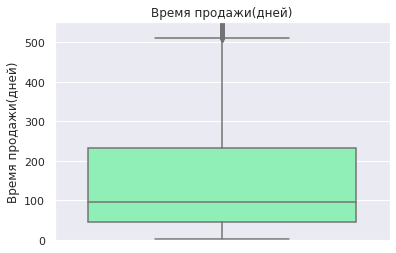

In [35]:
def my_boxplot(data, column, y_lim1, y_lim2, name):
    sns.set()
    sns.boxplot(y = column, 
                data = data,
                palette='rainbow')
    plt.ylim(y_lim1, y_lim2)
    plt.title(name)
    plt.ylabel(name)

    
my_boxplot(data, 'days_exposition', 0, 550, 'Время продажи(дней)')
print(data['days_exposition'].describe())

##### Вывод:
<br>
В среднем продажа квартиры занимает 180 дней, медианное же значение равно 95 дням. Мы построили ящик с усами из которого видно, что квартира считается проданной быстро, если время ее продажи менее 45 дней, а квартира которая продается долго - если объявление о продаже размещено более 231 дня.  

#### 4.3 Убираем редкие и выбивающиеся значения<a id ='step4.3'></a>
<br>
Определить редкие и выбивающиеся значения можно с помощью метода .boxplot(), или по иному ящика с усами, проведем очистку данных приведенных выше. 

##### Начнем с площади: 

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


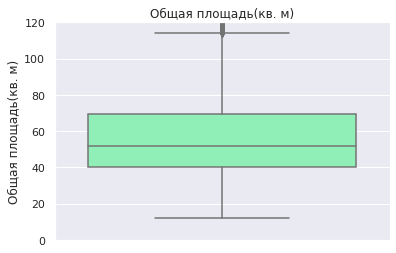

In [36]:
my_boxplot(data, 'total_area', 0, 120, 'Общая площадь(кв. м)')
print(data['last_price'].describe())

Как мы видим по ящику с усами, выбивающиеся значения начинаются от 110 квадратных метров, а минимум площади равен 12 квадратным метрам. Построим гистограмму очищенную от этих значений. Выделим cрез данных методом .query(). Срез сохраним в переменной clean_total_area. 

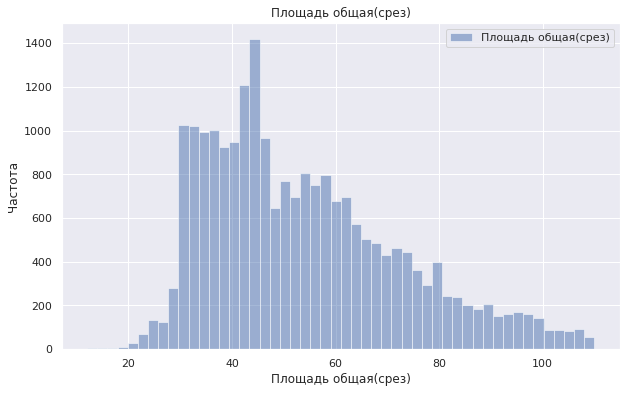

In [37]:
clean_total_area = data.query('12 <= total_area < 110')

my_graph(clean_total_area, 'total_area', 12, 110, 'Площадь общая(срез)')


Мы обнаружили что площадь квартир лежит в интервале от 12 до 110 квадратных метров, что соответствует адекватной площади на рынке недвижимости.  

##### Теперь займемся ценой:

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


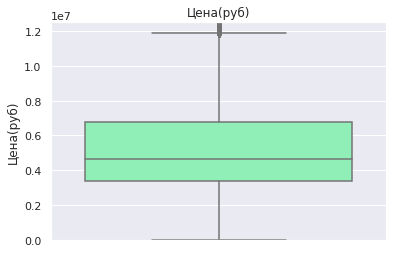

In [38]:
my_boxplot(data, 'last_price', 0, 12500000, 'Цена(руб)')
print(data['last_price'].describe())

 Как мы видим, нижний ус находится на уровне 12 190 рублей, это неадекватная цена для квартиры, возьмем нижнее значение равное 1 000 000 рублей, верхний ус находится на уровне 12 000 000 рублей, выше начинаются редкие и выбивающиеся значения.Выделим cрез данных методом .query(), сохраним его в переменной clean_last_price, и построим ее гистограмму: 

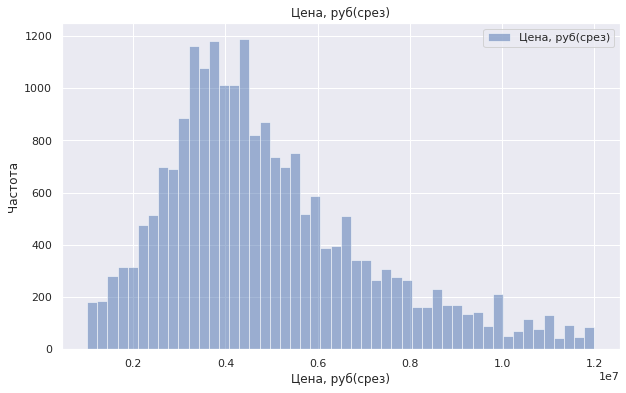

In [39]:
clean_last_price = data.query('1000000 <= last_price < 12000000')
my_graph(clean_last_price, 'last_price', 1000000, 12000000, 'Цена, руб(срез)')


Как мы определили интересущий нас диапозон стоимости жилья находится в пределах от 1 млн. рублей до 12 млн рублей. Сейчас данные о стоимости удобнее использовать и понимать их  

##### Проделаем тоже самое для высоты потолков: 

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


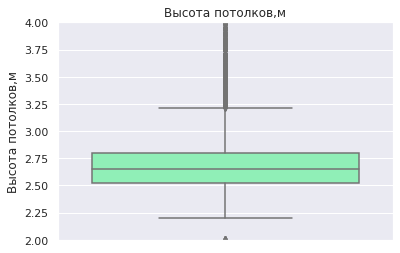

In [40]:
my_boxplot(data, 'ceiling_height', 2, 4, 'Высота потолков,м')

print(data['ceiling_height'].describe())

Как мы видим, нижний ус находится на уровне 2,25 метра, верхний ус находится на уровне 3,25 метра, выше и ниже усов начинаются редкие и выбивающиеся значения. Выделим cрез данных методом .query(), сохраним его в переменной clean_ceiling_height, и построим ее гистограмму:

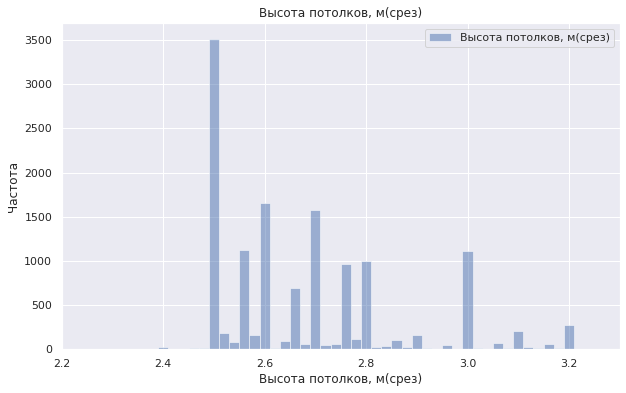

In [41]:
clean_ceiling_height = data.query('2.25 < ceiling_height < 3.25')

my_graph(clean_ceiling_height, 'ceiling_height', 2.25, 3.25, 'Высота потолков, м(срез)')

Как и ожидалось, после очистки данных от артефактов, оказалось, что большая часть квартир имеет стандартизированные высоты потолков, если сильно заморочиться, можно даже по высоте потолков определить тип дома(сталинка, хрущевка, панелька, новостройка) так как у этих зданий была разная высота потолков

##### Проделаем вышеприведеные действия для количества комнат: 

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


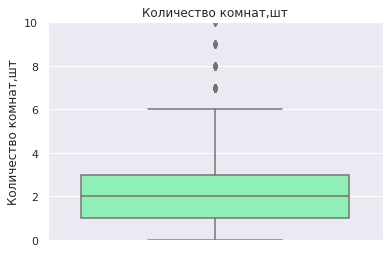

In [42]:
my_boxplot(data, 'rooms', 0, 10, 'Количество комнат,шт')
print(data['rooms'].describe())

Как мы видим, нижний ус находится на уровне 0 комнат, что явно неадекватно, возьмем нижний порог в 1 комнату, верхний ус находится на уровне 6 комнат, выше начинаются редкие и выбивающиеся значения. Выделим cрез данных методом .query(), сохраним его в переменной clean_rooms, и построим ее гистограмму:

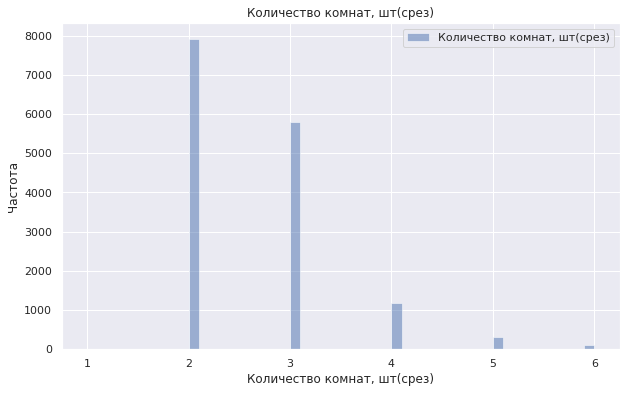

In [43]:
clean_rooms = data.query('1 < rooms < = 6')
my_graph(clean_rooms, 'rooms', 1, 6, 'Количество комнат, шт(срез)')

Как мы видим, количество комнат имеет распределение Пуассона, больше всего однокомнатных квартир, а меньше всего шестикомнатных. Как и впринципе на рынке недвижимости. 

##### А что же со временем продажи? Разберемся с этим моментом 

Выделим cрез данных методом .query(), условием для метода возьмем что время продажи квартиры не превышает 500 дней, как видно из построенного выше ящика с усами, так как нижний ус находится на минимальном значении в 1 день, и это значение имеет право на существование(вдруг кому-то повезло продать квартиру сразу после размещения объявления). 

Сохраним полученные данные в переменной clean_days_exposition и построим для нее гистограмму:

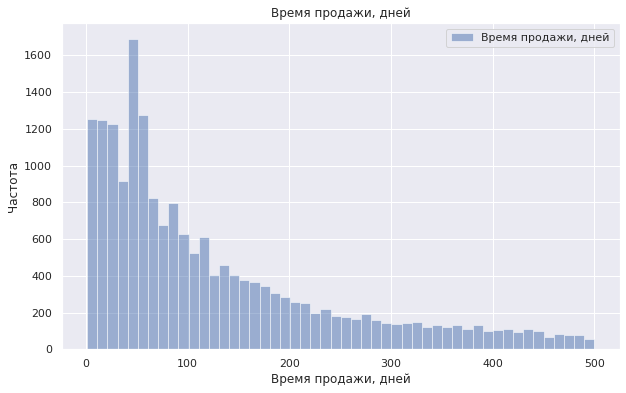

In [44]:
clean_days_exposition = data.query('days_exposition < 500')
my_graph(clean_days_exposition, 'days_exposition', 1, 500, 'Время продажи, дней')


Посмотрим в дополнение к гистограмме числовое описание данных:

In [45]:
print(clean_days_exposition['days_exposition'].describe())

count    18721.000000
mean       126.889055
std        119.022015
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64


 Время продажи квартиры:Как мы видим после того, как мы избавились от редких и выбивающихся значений. Среднее значение стало 126 дней, вместо 180 до удаления выдающихся значений. А медиана стала равна 84 дням, вместо 95 дней до очистки данных. Как мы видим, максимальное количество значений приходится на 50 дней. Данные стали более наглядными и правдоподобными.   
 
 ##### Вывод:
<br>
Очистка данных от редких и выбивающихся значений позволила нам понять какие границы характеризуют тот или иной параметр продаваемых квартир. Сейчас данные стали намного понятнее, чем до обработки выбросов.

#### 4.4 Изучаем факторы влияющие на стоимость квартиры<a id ='step4.4'></a>
<br>

##### Зависимость цены от площади, количества комнат и удаленности от центра
Посмотрим зависит ли цена от площади, числа комнат, удаленности от центра. Для этого определим коэффициент корреляции Пирсона, с помощью метода .corr(): 

In [46]:
print('Коэффициент корреляции Пирсона между ценой и площадью:', data['last_price'].corr(data['total_area']))
print('Коэффициент корреляции Пирсона между ценой и количеством комнат:', data['last_price'].corr(data['rooms']))
print('Коэффициент корреляции Пирсона между ценой и удаленностью от центра:', data['last_price'].corr(data['city_сenters_nearest']))

Коэффициент корреляции Пирсона между ценой и площадью: 0.6537428966335397
Коэффициент корреляции Пирсона между ценой и количеством комнат: 0.36342062218770693
Коэффициент корреляции Пирсона между ценой и удаленностью от центра: -0.20688702501498762


Как мы видим, из приведенных выше значений: 

1. Самая сильная связь между площадью и ценой, коэф. корреляции для этих двух величин равен 0,65, так как он положительный то с ростом площади увеличивается и стоимость квартиры. 

2. Связь между количеством комнат и ценой не такая сильная, как в первом случае, но все же она есть. Коэф. корреляции равен 0.36, так как связь положительная, то с ростом количества комнат увеличивается и цена. Можно сказать, что количество комнат в какой то степени отражает зависимость цены от площади, так как с увеличением количества комнат увеличивается и площадь.

3. Зависимость цены и удаленность от центра менее сильная чем в первых двух случаях и имеет отрицательную величину. Коэффициент корреляции равен - 0,2, что означает, что с ростом расстояния до центра цена на квартиру уменьшается. 

Построим графики зависимости цены от площади, количества комнат и удаленности от центра.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


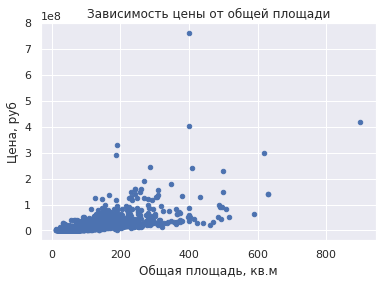

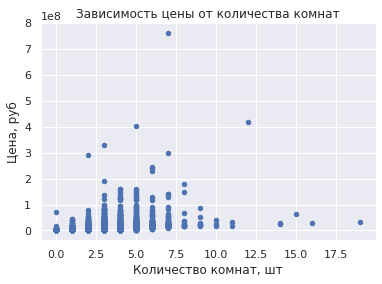

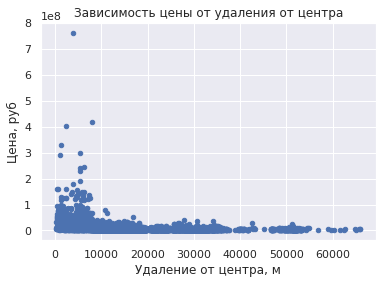

In [47]:
def my_scatter(data, x1, y1, name, x_name):
    data.plot(x = x1, y = y1, kind = 'scatter')
    plt.title(name)
    plt.xlabel(x_name)
    plt.ylabel('Цена, руб')
    
    
my_scatter(data, 'total_area', 'last_price', 'Зависимость цены от общей площади', 'Общая площадь, кв.м')
my_scatter(data, 'rooms', 'last_price', 'Зависимость цены от количества комнат', 'Количество комнат, шт')
my_scatter(data, 'city_сenters_nearest', 'last_price', 'Зависимость цены от удаления от центра', 'Удаление от центра, м')


Как видно из графиков, с увеличением площади, цена квартиры увеличивается практически линейно, по количеству комнат у нас получились несколько иные данные - самые дорогие 4 и 5 комнатные квартиры, а далее с увеличением количества комнат идет уменьшение цены, самые дорогие квартиры в радиусе 7 километров от центра, далее идет резкое снижение цены, а далее мы видим очень пологое, почти прямое снижение цены на квартиры. 


##### Зависимость от категории этажа квартиры. 

Для сравнения влияния категории этажа воспользуемся бибилиотекой seaborn, так как она позволяет сравнивать категориальные и количественные величины в одном графике. 

Text(0, 0.5, 'Цена, руб')

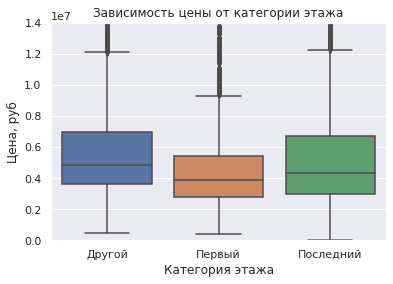

In [48]:
sns.boxplot(x = 'cat_floors', y='last_price', data=data)
plt.ylim(0,14000000)
plt.title('Зависимость цены от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Цена, руб')

Как видно из графика квартиры на первом этаже занчительно дешевле остальных. Квартиры на последних этажах дороже квартир на первых этажах, но если сравнивать первый квартиль, то они практически идентичны. А вот третий квартиль - уже значительно отличается. Квартиры на остальных этажах, дороже чем на первых и последних. 

Что ж поделать, таков рынок недвижимости. Цена на первых этажах ниже, потому что там большая проходимость людей, отсюда шум хлопающей двери, лифта, ну и как правило, первые этажи самые темные.   

Последние этажи хоть и не имеют недостатков первых, но все же - имеют вероятность протечки кровли, зачастую там слышен шум лифтового оборудования. А если лифт сломается, подниматься и спускаться становится очень сложно. 

##### Зависимость цены от дня недели, месяца и года

Построим графики зависимости цены от указанных временных показателей и подробно изучим их. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


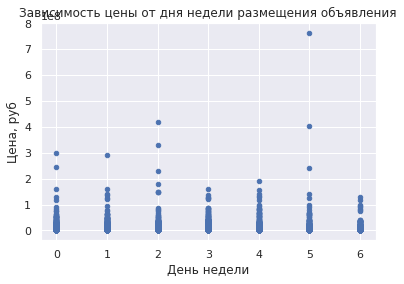

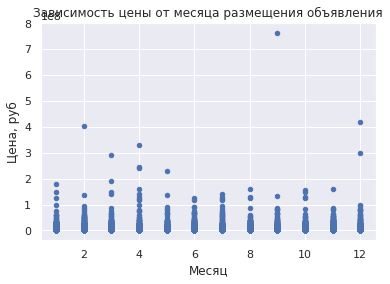

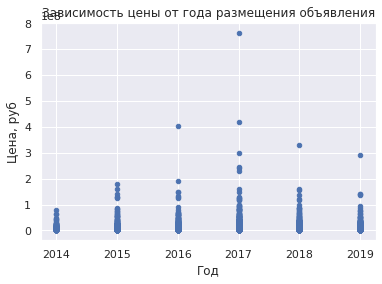

In [49]:
my_scatter(data, 'weekday', 'last_price', 'Зависимость цены от дня недели размещения объявления', 'День недели')
my_scatter(data, 'month', 'last_price', 'Зависимость цены от месяца размещения объявления', 'Месяц')
my_scatter(data, 'year', 'last_price', 'Зависимость цены от года размещения объявления', 'Год')

1. Зависимость цены от дня недели: на графике отчетливо видно, что наиболее дорогие объявления размещают в четверг и воскрсенье, наиболее дешевые во вторник.
<br>

2. По месяцам картина следующая - самые дорогие обьявления в январе, апреле и июле. Самые же дешевые объявления - в марте, сентябре и ноябре. Дело в том, что люди планируют приобретать новое жилье, и выставляют квартиры немного дешевле рынка, чтобы успеть продать квартиру к весне и к новому году. В ноябре как правило люди продают квартиры дешевле, чтобы перед новым годом, когда выдают премии и бонусы успеть купить другую квартиру. Дорогая цена в январе, апреле и июле вызвана повышенным спросом на квартиры в это время. В январе рынок оживает после нового года, в апреле и июле спрос повышен из-за того, что лето и осень традиционное время переездов.  
<br>

3. По годам же масимальные цены и соответственно и спрос были в 2017 и 2018 годах, минимальная же цена была в 2014 году из-за девальвации рубля, 2015 год - был посткризисным, в 2019 году же, была изменена процедура покупки квартиры в долевую собственность, введены эскроу-счета, которые повысили цены на новостройки, однако же некоторые объекты достраивались еще по старым правилам, и они старались продать квартиры в этих объектах без учета увеличения цен иногда же с неплохим дисконтом.

In [50]:
(data
.corr()['last_price']
.to_frame()
.sort_values('last_price', ascending=False)
.style
.background_gradient(cmap="Greens")
)

,last_price
last_price,1
price_square_meter,0.736562
total_area,0.653743
living_area,0.585587
kitchen_area,0.517376
rooms,0.363421
ponds_around3000,0.160243
parks_around3000,0.150886
total_images,0.104558
ceiling_height,0.0853963


#### 4.5 Изучаем стоимость жилья в 10 населенных пунктах<a id ='step4.5'></a>
<br>
Для того чтобы вычислить 10  населенных пунктов с наибольшим числом объявлений воспользуемся методом .pivot_table и выведем 15 первых строк. 

In [51]:
top_ad = data.pivot_table(index = 'locality_name', 
                             values = 'price_square_meter', 
                             aggfunc =('count','mean')).sort_values(by = 'count', ascending = False)
top_ad.head(15)

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008793
посёлок Мурино,522,85752.189157
посёлок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
посёлок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


Применим метод .query() для создания таблицы с 10 первыми результатами, округлим среднюю стоимость и отсортируем по ней таблицу 

In [52]:
top_10_ad = top_ad.query('count  > = 237')
top_10_ad = top_10_ad.sort_values(by = 'mean', ascending = False).round(0)
print(top_10_ad)

                   count      mean
locality_name                     
Санкт-Петербург    15721  114849.0
Пушкин               369  103126.0
деревня Кудрово      299   92474.0
посёлок Парголово    327   90176.0
посёлок Мурино       522   85752.0
посёлок Шушары       440   78677.0
Колпино              338   75425.0
Гатчина              307   68746.0
Всеволожск           398   68654.0
Выборг               237   58142.0


 ##### Вывод:
<br>
Как видно из таблицы,  самое дорогое жилье ожидаемо в Санкт - Петербурге, а самое дешевое во Всеволожске. 

#### 4.6 Изучаем предложения квартир в Санкт - Петербурге<a id ='step4.6'></a>
<br>

Для того чтобы выделить квартиры в Санкт - Петербурге воспользуемся срезами данных, затем создадим новый столбец с расстоянием до центра в километрах, округлим его до целых значений. Посчитаем средню цену квартир для каждого километра. Построим график и определим границы центра города. 

Text(0.5, 0, 'Удаление от центра, км')

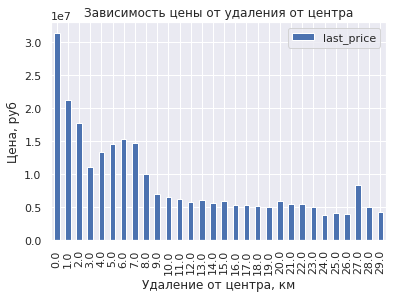

In [53]:
data_spb = data.query('locality_name == "Санкт-Петербург"').copy()
data_spb['city_сenters_nearest_km'] = (data_spb['city_сenters_nearest'] / 1000).round()
price_km = data_spb.pivot_table(index = 'city_сenters_nearest_km', values = 'last_price', aggfunc = 'mean')
price_km.plot(y = 'last_price',kind = 'bar')
plt.title('Зависимость цены от удаления от центра')
plt.ylabel('Цена, руб')
plt.xlabel('Удаление от центра, км')

 ##### Вывод:
<br>
Центральная зона Санкт - Петербурга равна радиусу 7 километров от центральной точки города. 

#### 4.7 Изучаем сегмент квартир в центре Санкт- Петербурга<a id ='step4.7'></a>
<br>
Для того чтобы проанализаровать квартиры в центре Санкт-Петербурга, необходимо сделать срез данных для выделения этого сегмента недвижимости, после этого проанализируем следующие параметры жилья: площадь, цену, число комнат, высота потолков.  

##### Начнем сравнение с общей площади:

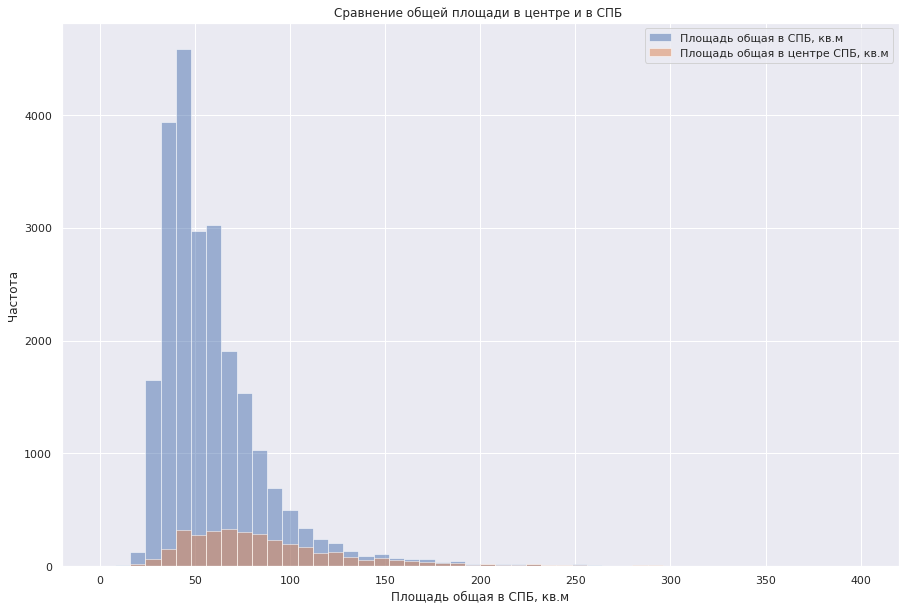

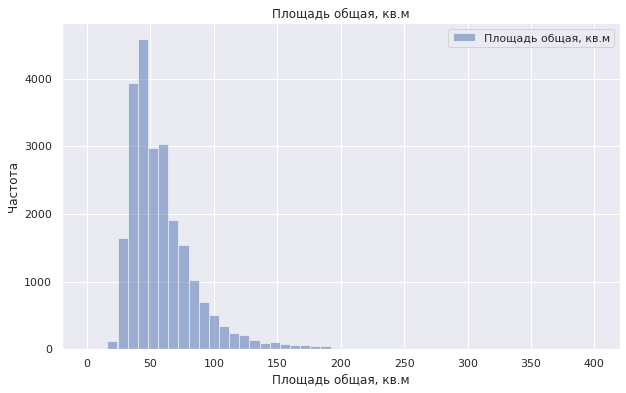

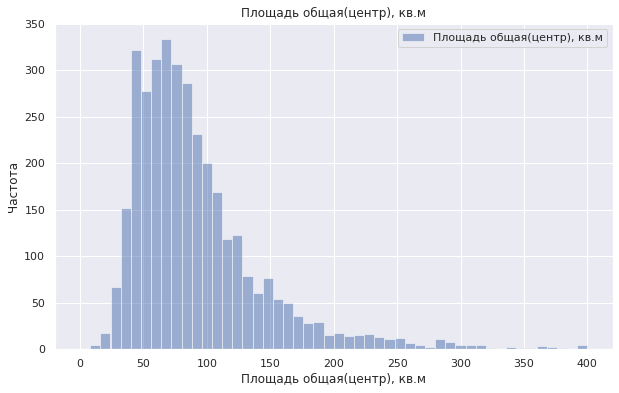

In [54]:
data_spb_center = data_spb.query('city_сenters_nearest_km <= 7')

def my_hist(data1, data2, range1, range2, name, name1, name2):
    
    fig, ax = plt.subplots()
    
    ax.hist( data1,
              bins = 50,
              alpha = 0.5,
              range = (range1, range2),
              label = name1)
         
    
    ax.hist( data2,
              bins = 50,
              alpha = 0.5,
              range = (range1, range2),
              label = name2)
    
    ax.legend()
               
    fig.set_figheight(10)
    fig.set_figwidth(15)
            
    plt.title(name)
    plt.xlabel(name1)
    plt.ylabel('Частота')
    
   
    plt.show()
    
    
my_hist(data['total_area'],
        data_spb_center['total_area'], 0, 400,
        'Сравнение общей площади в центре и в СПБ ',
        'Площадь общая в СПБ, кв.м', 
        'Площадь общая в центре СПБ, кв.м')
             
my_graph(data, 'total_area', 0, 400, 'Площадь общая, кв.м')
my_graph(data_spb_center, 'total_area', 0, 400, 'Площадь общая(центр), кв.м')



 ##### Вывод:
<br>
Как видно из графиков, площадь общая в центре отличается в большую сторону от площади в данных за Санкт-Петербург и окрестности, связано это с тем, что в центре довольно популярны клубные дома, когда квартира занимает половину этажа, также исторический центр Санкт-Петербурга построен в дореволюционные времена, когда стандарты общей площади были более просторными.

##### Теперь проанализируем цену жилья в центре и в исходных данных:


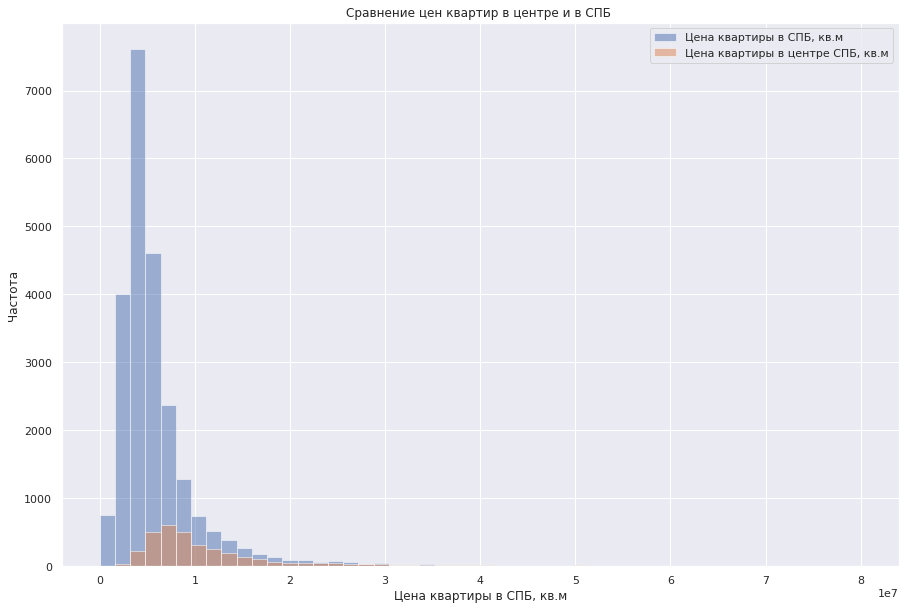

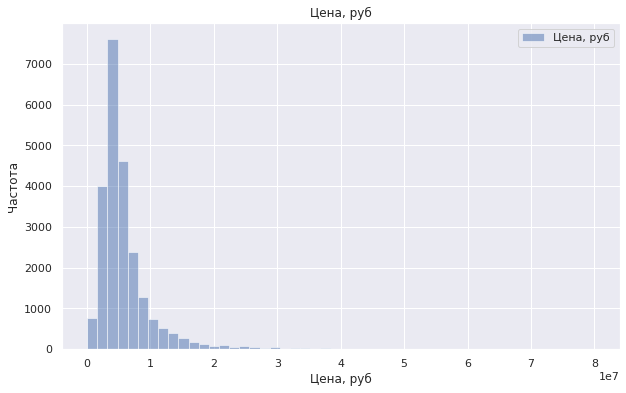

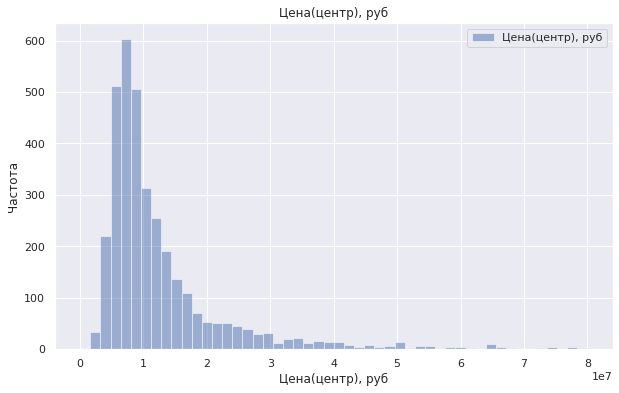

In [55]:
my_hist(data['last_price'],
        data_spb_center['last_price'],
         0, 80000000,
        'Сравнение цен квартир в центре и в СПБ ',
        'Цена квартиры в СПБ, кв.м', 
        'Цена квартиры в центре СПБ, кв.м')

my_graph(data, 'last_price', 0, 80000000, 'Цена, руб')
my_graph(data_spb_center, 'last_price', 0, 80000000, 'Цена(центр), руб')



##### Вывод:
<br>

На гистограмме отчетливо прослеживается, что пие цены в центре значительно выше, нежели в исходных данных. Это неудивительно, центр Санкт-Петербурга славится своим элитным жильем. Видовые квартиры тут стоят больше десяти миллионов рублей, максимальное же значение в центре находится высоко над небесами. 

##### А что же с числом комнат?:

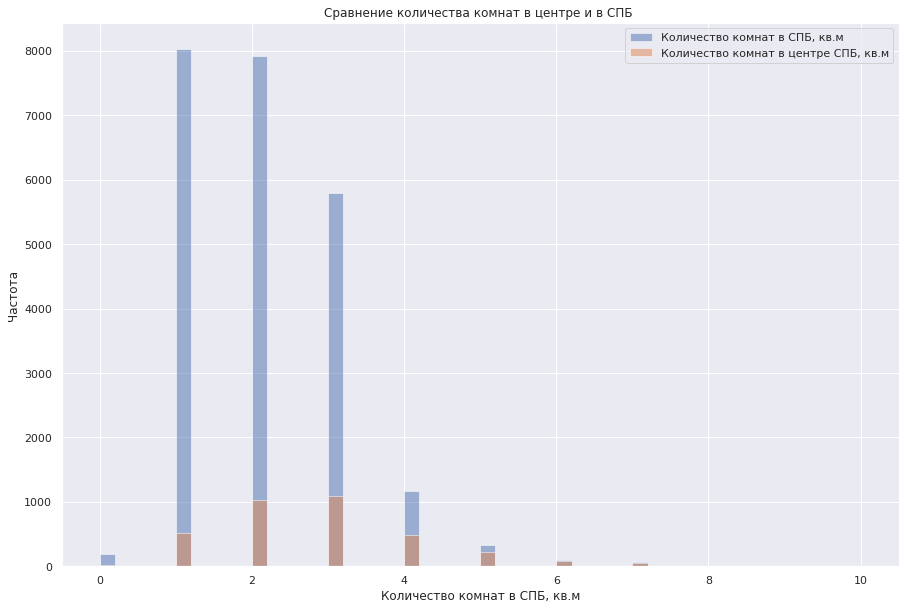

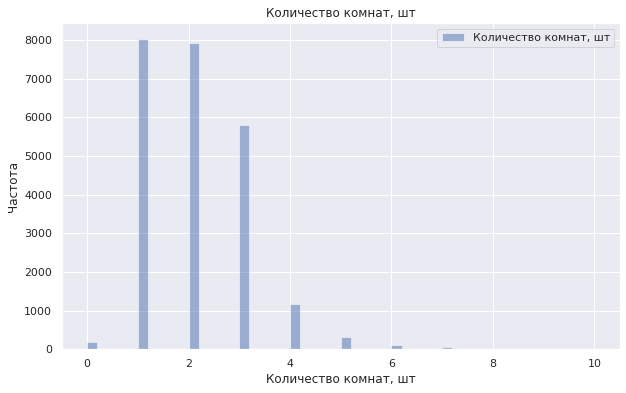

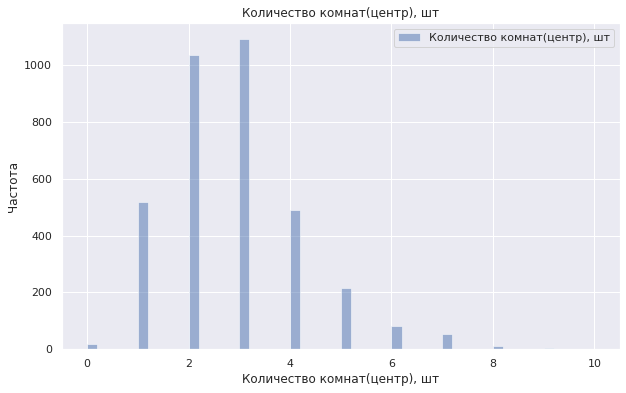

In [56]:
my_hist(data['rooms'],
        data_spb_center['rooms'],
         0, 10,
        'Сравнение количества комнат в центре и в СПБ ',
        'Количество комнат в СПБ, кв.м', 
        'Количество комнат в центре СПБ, кв.м')

my_graph(data, 'rooms', 0, 10, 'Количество комнат, шт')
my_graph(data_spb_center, 'rooms', 0, 10, 'Количество комнат(центр), шт')

##### Вывод:
<br>
Из графиков видно, что в центре количество комнат тоже отличается в большую сторону от исходного датасета, это неудивительно, ведь общая площадь тоже выше в центральной зоне Питера. 

##### Высота потолков: 

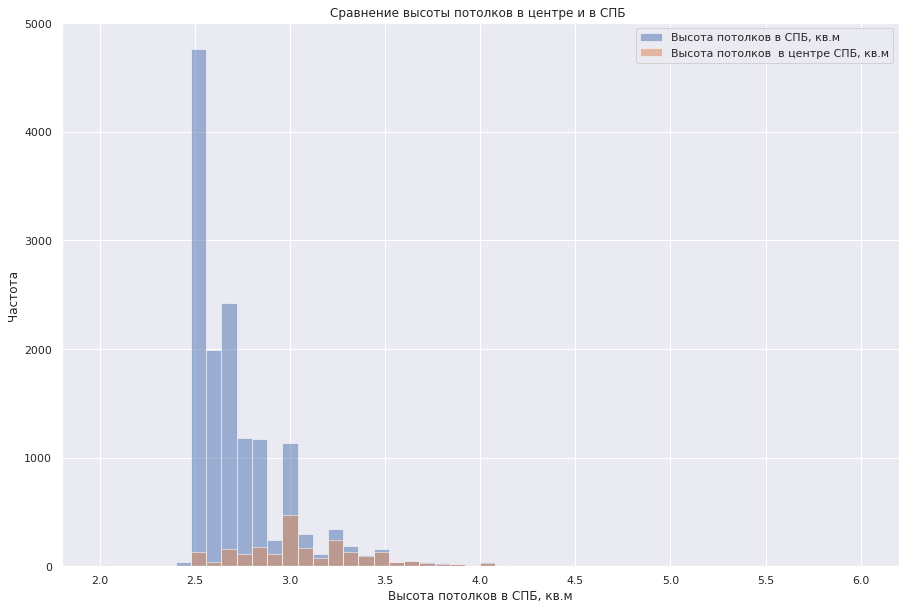

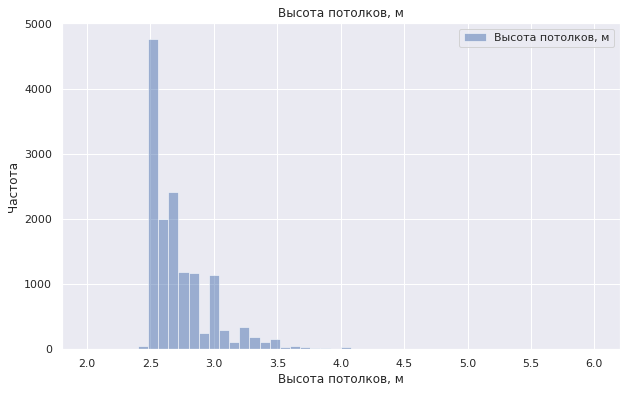

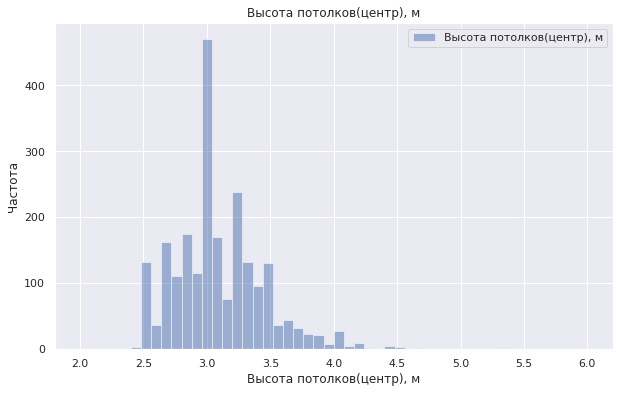

In [57]:
my_hist(data['ceiling_height'],
        data_spb_center['ceiling_height'],
         2, 6,
        'Сравнение высоты потолков в центре и в СПБ ',
        'Высота потолков в СПБ, кв.м', 
        'Высота потолков  в центре СПБ, кв.м')

my_graph(data, 'ceiling_height', 2, 6, 'Высота потолков, м')
my_graph(data_spb_center, 'ceiling_height', 2, 6, 'Высота потолков(центр), м')


##### Вывод:
<br>
    В центре на графике пик высоты потолков приходится на 3 метра, тогда как в исходных данных пик высоты потолков приходится на 2,5 метра. Тут тоже влияют разные строительные нормы при строительстве более возрастных домов в центре и более современных домов за его пределами. Также статистику в остальных районах портит массовая советская застройка с высотой потолков не более 2,5 метров. Также необходимо отметить, что в центре больше квартир с высотой потолков от 3 до 4 метров.


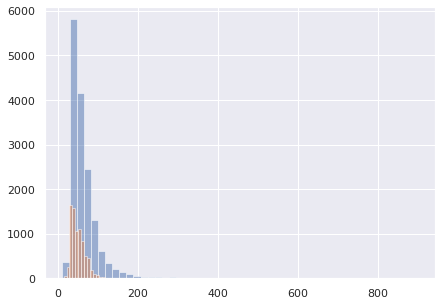

In [58]:
# в качестве легкого примера прямо из коробки `pandas`

data.query('locality_name == "Санкт-Петербург"')['total_area'].hist(figsize = (7, 5), alpha=0.5, bins=50)
data.query('locality_name != "Санкт-Петербург"')['total_area'].hist(figsize = (7, 5), alpha=0.5, bins=50)

#### 4.8 Изучаем факторы влияющие на стоимость жилья в центре Санкт- Петербурга<a id ='step4.8'></a>
<br>

##### Начнем с влияния площади на стоимость: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


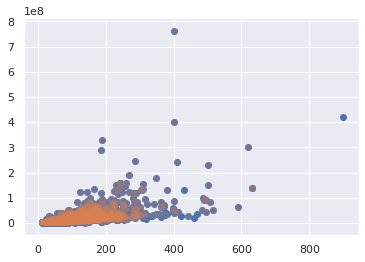

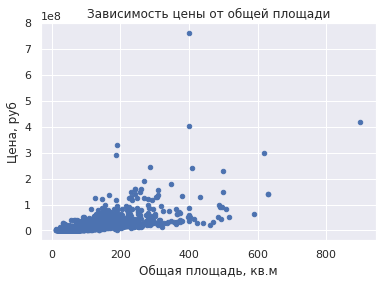

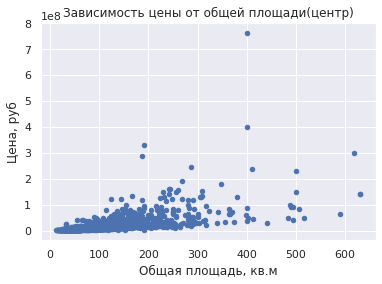

In [59]:
fig, ax = plt.subplots()
x1 = my_scatter(data, 'total_area', 'last_price', 'Зависимость цены от общей площади', 'Общая площадь, кв.м')
x1 = my_scatter(data_spb_center, 'total_area', 'last_price', 'Зависимость цены от общей площади(центр)', 'Общая площадь, кв.м')
x1 = data['total_area']
y1 = data['last_price']
x2 = data_spb_center['total_area']
y2 = data_spb_center['last_price']
ax.scatter(x1, y1, alpha = 1)
ax.scatter(x2, y2, alpha = 0.2)

##### Вывод:
<br>
В центре площадь оказывает менее значительное влияние, нежели в исходных данных. Как мы видим, в центре города возрастание цены в зависимости от площади происходит более полого.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


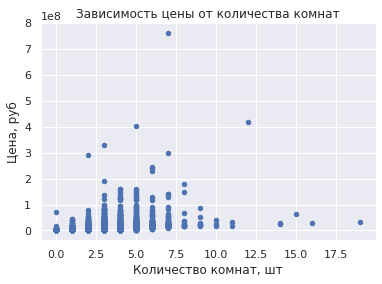

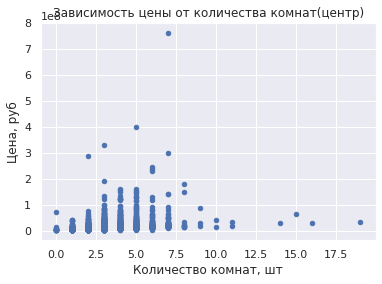

In [60]:
my_scatter(data, 'rooms', 'last_price', 'Зависимость цены от количества комнат', 'Количество комнат, шт')
my_scatter(data_spb_center, 'rooms', 'last_price', 'Зависимость цены от количества комнат(центр)', 'Количество комнат, шт')


##### Вывод:
<br>
На стоимость квартир в центре города количество комнат влияет таким же образом, как и в исходных данных. То есть самые дорогие квартиры - 4-х и пятикомнатные, а самые дешевые - однокомнатные, квартиры с количеством комнат более 5 - постепенjevtymif.ncz в стоимости. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


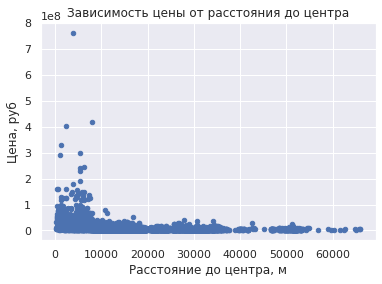

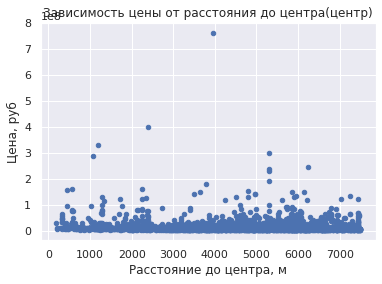

In [61]:
my_scatter(data, 'city_сenters_nearest', 'last_price', 'Зависимость цены от расстояния до центра', 'Расстояние до центра, м')
my_scatter(data_spb_center, 'city_сenters_nearest', 'last_price', 'Зависимость цены от расстояния до центра(центр)', 'Расстояние до центра, м')



##### Вывод:
<br>
Удаленность от центральной точки города влияет на стоимость квартиры в центре менее выражено нежели в исходных данных, где наблюдался резкий провал стоимости на удалении от центра более 7 километров. На графике зависимости в центре мы видим пологое изменение цены. 

##### Зависимость цены от даты публикации: 

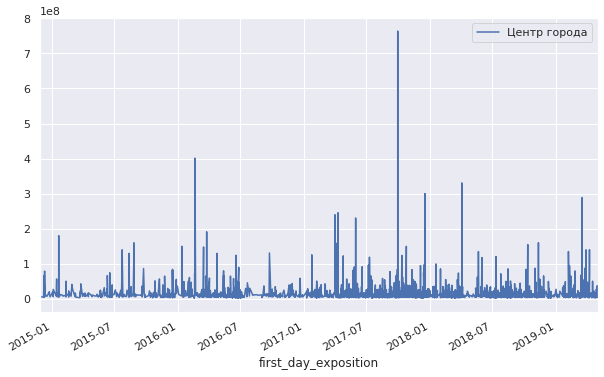

In [62]:
data_spb_center.plot(x = 'first_day_exposition', y = 'last_price', figsize = (10,6), label = 'Центр города')

##### Вывод:
<br>
В зависимости от даты размещения объявления цена на квартиры в центре с течением времени постепенно растет, однако же на графике отчетливо видны всплески и провалы в зависимости от месяца размещения, всплески и падения в зависимости от месяцев совпадают с графиками полученными в ходе исследований исходных данных. Также наблюдается провал стоиомсти квартир в центре с июля 2016 года по январь 2017. Это вызвано рядом факторов - впервые была введена господдержка ипотеки, введено большое количество интересных объектов, соответственно на рынке было много предложений и цена оставалась приемлемой. Многие застройщики держали цены для реализации максимального числа построенного жилья. Вторичный рынок всегда ориентировался по стоимости на новостройки, поэтому цены на нем тоже оставались низкими.

### Шаг 5. Общий вывод<a id='step5'></a>
<br>
Нами была проделана большая работа по исследованию рынка недвижимости Санкт- Петербурга и соседних населенных пунктов. В ходе исследования мы провели предобработку данных различными методами изученными ранее, рассчитали и добавили данные необходимые для качественного исследования, выявили взаимосвязь различных параметров жилья и их влияние друг на друга, множество раз отработали построение различных графиков и их изучение. 

Надо отметить, что проект очень объемный и интересный. Прямо захотелось перебраться в Питер. 

##### Яндекс.Спасибо.
